1.**Data Collection i.e. Downloading Images**
- Downloading data from google/web
- Downloading data from kaggle.com
- Build a image web crawler
- Use python libraries to scrape the images using bing image downloader ✅

In [1]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir images

In [3]:
# donwloading sunfower images using bing image downloader
from bing_image_downloader import downloader
downloader.download("preety sunflower", limit=60,  output_dir='/content/images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/images/preety sunflower


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/85/91/b1/8591b18d357c3941fed68c694da47441.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/_W5lGWFz2VV4/TK5PqUu-ZTI/AAAAAAAAA-Q/rQXb9VnKUDc/s1600/_MG_3422+copy.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://images.fineartamerica.com/images-medium-large/pretty-flowers-steve-mckinzie.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://inspirationseek.com/wp-content/uploads/2014/05/Lotus-Pretty-Flower.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://s-media-cache-ak0.pinimg.com/originals/5e/32/8f/5e328f67ab8287eb678a54320e2f0d82.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/78/db/99/78db999cf4ffa53856086fb14f845ba8.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://img00.deviantar

In [4]:
# downloading rugby ball images 
downloader.download("rugby ball leather", limit=60,  output_dir='/content/images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/images/rugby ball leather


[!!]Indexing page: 1

[%] Indexed 47 Images on Page 1.


[%] Downloading Image #1 from https://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-heritage-leather-rugby-ball-1_2356x.jpg?v=1550134680
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-heritage-leather-rugby-ball-2_2048x.jpg?v=1550134680
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.notonthehighstreet.com/fs/66/7f/caf0-7c5a-45fa-a436-44b52ec027a6/original_ram-rugby-vintage-leather-rugby-ball.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://ceefc02649d25ca315ac-ef93c2ad0985f7464ef79b04e64427fa.r18.cf2.rackcdn.com/product_images/3600/Rugby2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-brown-cream-leather-rugby-ball-1_2048x.jpg?v=1550134649
[%] File Downloaded !

[

In [5]:
# downloading ice cream cone images 
downloader.download("ice cream cone", limit=60,  output_dir='/content/images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/images/ice cream cone


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://cdiabetes.com/wp-content/uploads/2014/07/ice-cream-cone.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.kitcheninnovationsinc.com/wp-content/uploads/2014/07/J218DISP-Ice-Cream.png
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-DQlW2o-caGE/UWf_zXG5W_I/AAAAAAAABa0/yuTYvIaP0hc/s1600/ice-cream-cone-4650355-ji.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://4.bp.blogspot.com/-nWmK42rlhgI/UbHF2piCS4I/AAAAAAAASg8/Rf1wkLJEGXw/s1600/iceCREAMcone.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://elizabethdohertyauthor.files.wordpress.com/2016/08/ice-cream-cone.jpg
[Error]Invalid image, not saving https://elizabethdohertyauthor.files.wordpress.com/2016/08/ice-cream-cone.jpg

[!] Issue getting: https://elizabethdohertyauthor.files.wordpress.com/2016/08/ice-cream-co

### Data Preprocessing

In [7]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['preety sunflower', 'ice cream cone','rugby ball leather']

# iteration for categories
for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # label encoding the images
  path = os.path.join(DATADIR, category) # path for all images 
  
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # print(img_array.shape)
    # plt.imshow(img_array)

    img_resized = resize(img_array,(150,150,3)) # Normalizes the values between 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [8]:
flat_data[0]

array([0.46943232, 0.52917914, 0.46661981, ..., 0.07331081, 0.09307361,
       0.07739754])

<BarContainer object of 3 artists>

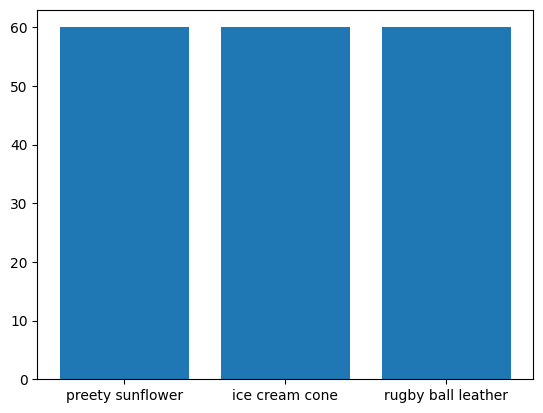

In [9]:
unique,count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

In [10]:
# splitting the data into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state=109)

In [11]:
# GridSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':[1,10,100,1000], 'kernel':['linear']},
    {'C':[1,10,100,1000], 'gamma':[0.001, 0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [12]:
# checking accuracy
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2])

In [13]:
y_test

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 0, 1, 2])

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
accuracy_score(y_pred,y_test)

0.7592592592592593

In [16]:
confusion_matrix(y_pred,y_test)

array([[14,  1,  0],
       [ 6, 12,  1],
       [ 2,  3, 15]])

In [17]:
# msaving the modeil using Pickle library
import pickle
pickle.dump(clf, open('img_model.p', 'wb'))

In [18]:
model = pickle.load(open('img_model.p', 'rb'))

Enter your URL: https://th.bing.com/th/id/OIP.2KGoEsKihdbja-L8TNgovAHaFj?w=278&h=208&c=7&r=0&o=5&pid=1.7
(208, 278, 3)
PREDICTED OUTPUT: preety sunflower


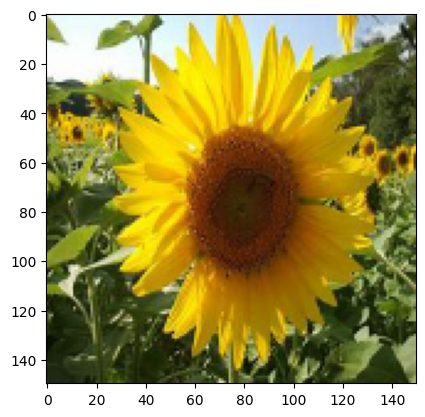

In [19]:
# testing with a new image
flat_data = []
url = input('Enter your URL: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [20]:
!pip install streamlit 
!pip install pyngrok
from pyngrok import ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=32ad70d9c8df7d44e9bdd1b10ecf3b945d8d70ae3401f24c5b44ad5969a38875
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

### Deployment
1. Web Page -> HTML/CSS/JS-Flask?Django
2. WebApp -> Streamlit/Dash ✅
3. Mobile App -> Kotlin/Java

In [25]:
# %%writefile app.py
# import streamlit as st

# st.title('Image Classifier')

Overwriting app.py


In [29]:
# !nohup streamlit run app.py &

# url = ngrok.connect(port='8501')
# url